**House** Prices

Projeto para Portfólio

In [10]:
# Importando Pandas
import pandas as pd

In [11]:
# Importando o dataset de treino
base = pd.read_csv('train.csv')

In [12]:
# Visualizando a base
base.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [13]:
# Retornando o shape da base / linhas por conlunas
base.shape

(1460, 81)

In [14]:
# Retornando as informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
# Visualizando quantidade de valores vazios
base.isnull().sum().sort_values(ascending=False).head(10)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [16]:
# Visualizando quantidade de valores vazios
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageQual,0.055479
GarageFinish,0.055479
GarageType,0.055479


In [17]:
# Eliminar colunas com mais de 10% de valores vazios
eliminar = base.columns[(base.isnull().sum()/base.shape[0]) > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [18]:
# Eliminado colunas
base = base.drop(eliminar, axis=1)

In [19]:
# Visualizando quantidade de valores vazios
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

,0
GarageYrBlt,0.055479
GarageQual,0.055479
GarageCond,0.055479
GarageType,0.055479
GarageFinish,0.055479
BsmtFinType2,0.026027
BsmtExposure,0.026027
BsmtQual,0.025342
BsmtCond,0.025342
BsmtFinType1,0.025342




---



Criar um primeiro modelo para verificar quando estamos errando e depois planejar como melhorar. Para isso:


*   Eliminar as colunas de texto
*   Tratar os valores vazios
*   Escolher alguns algoritmos para testar e um método de avaliação de erro


In [20]:
# Selecionando apenas as colunas numéricas
colunas = base.columns[base.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
# Criar uma nova base com esses valores
base2 = base[colunas]
base2.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500


In [22]:
# Verificar os valores vazios
base2.isnull().sum().sort_values(ascending=False).head(5)

,0
GarageYrBlt,81
MasVnrArea,8
LotArea,0
MSSubClass,0
Id,0


In [23]:
# Subistituir os valores vazios por -1
base2 = base2.fillna(-1)

* Essa sera a base inicial para começar o Modelo

<h1>Criando o Modelo</h1>

* Vamos separar em treino e teste
  * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split



---



In [24]:
# Selecionando X e y
X = base2.drop('SalePrice', axis=1)
y = base2['SalePrice']

In [25]:
# Importando o train_test_splip
from sklearn.model_selection import train_test_split

In [26]:
# separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

* O próximo passo é selecionar os algoritmos que vamos utilizar. Podemos começar com os algoritmos mais simples como:

  * Regressão Linear
  
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression


  * Arvore de Regressão

    * https://scikit-learn.org/stable/modules/tree_html#regression


  * KNeighborsRegressor

    * https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor
    


In [27]:
# importando regressão linear
from sklearn.linear_model import LinearRegression

In [28]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [29]:
# Fazendo a previsão para os dados para teste
y_rl = reg_rl.predict(X_test)


In [30]:
# Importando a arvore de regressão
from sklearn import tree

In [31]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [32]:
# Faznedo a Previsão
y_ar = reg_ar.predict(X_test)

In [33]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [34]:
# Criando o regressor e fazendo o dit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [35]:
# Fazendo a previsão
y_knn = reg_knn.predict(X_test)

* Avaliar esses dados utilizando tanto o erro absoluto quando o quadrático:

  * Erro médio absoluto
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
  
  * Erro quadrático
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    

In [36]:
# Importando o erro médio absuluto
from sklearn.metrics import mean_absolute_error

In [37]:
# Importando o erro médio quadrático
from sklearn.metrics import mean_squared_error

In [38]:
# Avaliando o erro da regressão
print('Regressão Linear')
print('MAE: ', mean_absolute_error(y_test, y_rl))
print('MSE: ', mean_squared_error(y_test, y_rl))

Regressão Linear
MAE:  23763.187393064567
MSE:  1533982883.444864


In [42]:
# Avaliando a arvore de decisão
print('Arvore de decisão')
print('MAE: ', mean_absolute_error(y_test, y_ar))
print('MSE: ', mean_squared_error(y_test, y_ar))

Arvore de decisão
MAE:  27580.78838174274
MSE:  2530245114.701245


In [43]:
# Avaliando o KNN
print('KNN')
print('MAE: ', mean_absolute_error(y_test, y_knn))
print('MSE: ', mean_squared_error(y_test, y_knn))

KNN
MAE:  33273.08298755187
MSE:  2733937586.841286


* Podemos plotar visualmente a relação do y_test com as previsões feitas

In [44]:
# importando matplolib
import matplotlib.pyplot as plt

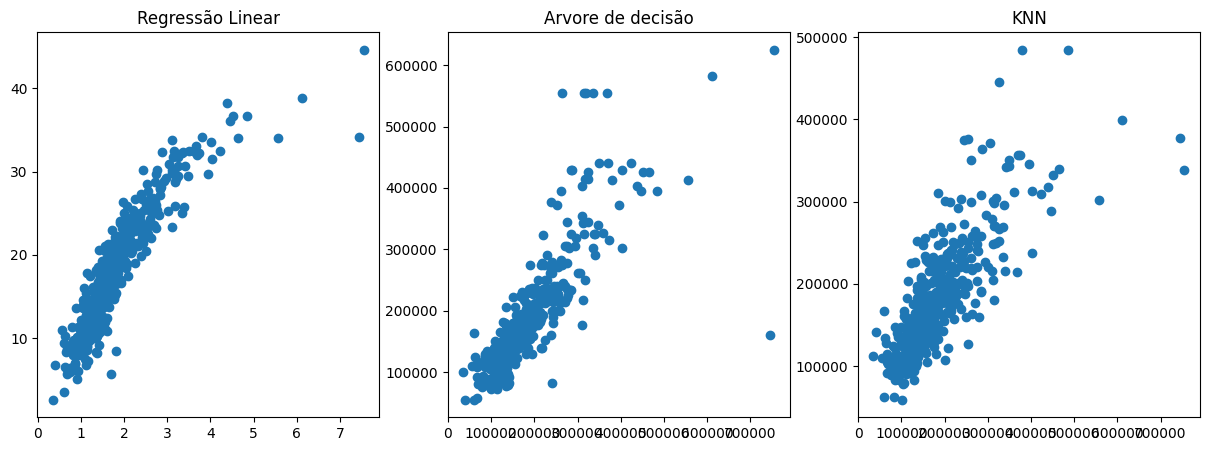

In [47]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15, 5))
ax[0].scatter(y_test/100000, y_rl/10000)
ax[0].set_title('Regressão Linear')
ax[1].scatter(y_test, y_ar)
ax[1].set_title('Arvore de decisão')
ax[2].scatter(y_test, y_knn)
ax[2].set_title('KNN')
plt.show()


* Vamos utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio pelo Kaggle na hora de classificar os modelos

<h1>Fazendo a previsão para a base de teste da competição



In [56]:
# importando a base de testes
base_test = pd.read_csv('test.csv')

In [57]:
# Visualizando a base
base_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [58]:
# Eliminando as mesmas colunas da base de treino
base_test = base_test.drop(eliminar, axis=1)


In [61]:
# Verificando as colunas numéricas
colunas2 = base_test.columns[base_test.dtypes != 'object']
colunas2





Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [62]:
# Mantendo também somente as colunas numéricas
base_test = base_test[colunas2]

In [63]:
# Verificando a base_test restante
base_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [65]:
# Visualizando a quantidade de valores vazios
base_test.isnull().sum().sort_values(ascending=False).head(10)

,0
GarageYrBlt,78
MasVnrArea,15
BsmtHalfBath,2
BsmtFullBath,2
GarageCars,1
GarageArea,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFinSF1,1


* Vamos precisar  retirar os valores vazios pois a regressão linear não cai conseguir trabalhar com valores vazio
  * Se terntarmos usar essa base, ela vai retornar um erro dizendo que o **input possui valores NaN**
* Podemos apenas bubstituir por -1 como fizemos acima


In [66]:
# Substituido os valores vazios por menos -1
base_test = base_test.fillna(-1)

* Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle

In [70]:
# Vamos usar o KNN para fazer a previsão
y_pred = reg_rl.predict(base_test)
y_pred

array([122234.99595955, 139178.26368417, 169872.05425124, ...,
       175307.58803209, 106132.5314242 , 251494.07738729])

In [71]:
# Pode mos adicionar essa coluna de previsão na nossa base
base_test['SalePrice'] = y_pred

In [73]:
# Extrair somente o Id e o SalePrice
resultado = base_test[['Id', 'SalePrice']]
resultado.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


In [75]:
# Podemos então exportar a base
resultado.to_csv('resultado.csv', index=False)


<h3> Próximos passos</h3>

* Melhorar a limpeza dos dados
* Fazer engenharia de recursos
* Padronização / Normalização de dados
* Seleção de variáveis